# Analyze the co-occurences of the terms in the required qualifications

In [40]:
import os
import json
import string
import nltk
from nltk import word_tokenize, FreqDist, pos_tag
from nltk.corpus import stopwords
import pandas as pd
import pickle
import numpy as np
%matplotlib inline

In [2]:
df_ori = pd.read_csv('../data/data job posts.csv')
df_ori.head()
print(df_ori.shape)
df = df_ori.drop_duplicates(['RequiredQual'])
print(df.shape)
print("Removed {0} duplicates (based on RequiredQual)".format(df_ori.shape[0]-df.shape[0]))

(19001, 24)
(16689, 24)
Removed 2312 duplicates (based on RequiredQual)


In [3]:
df["RequiredQual"].head()

0    To perform this job successfully, an\r\nindivi...
1    - Bachelor's Degree; Master's is preferred;\r\...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

In [4]:
df["RequiredQual"] = df["RequiredQual"].astype(str)

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
df["RequiredQual"] = df["RequiredQual"].apply(lambda x: x.replace("\r\n", " "))
df["RequiredQual"].head()

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    To perform this job successfully, an individua...
1    - Bachelor's Degree; Master's is preferred; - ...
2    - Degree in environmentally related field, or ...
3    - Advanced degree in public health, social sci...
4    - University degree; economical background is ...
Name: RequiredQual, dtype: object

## Try the NLTK POS tagger

In [7]:
sent = '''Professor Tan Eng Chye, NUS Deputy President and Provost, and Professor 
Menahem Ben-Sasson, President of HUJ signed the joint degree agreement at NUS, 
in the presence of Ambassador of Israel to Singapore Her Excellency Amira Arnon 
and about 30 invited guests, on July 03, 2013.
'''
pos_tagged = pos_tag(word_tokenize(sent), tagset='universal')
#pos_tagged

In [18]:
df['RequiredQual_token'] = df['RequiredQual'].map(word_tokenize)
df['Required_Qual_POS'] = df['RequiredQual_token'].map(pos_tag, {"tagset": "universal"})

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [19]:
df['Required_Qual_POS'].head()

0    [(To, TO), (perform, VB), (this, DT), (job, NN...
1    [(-, :), (Bachelor, NN), ('s, POS), (Degree, N...
2    [(-, :), (Degree, NN), (in, IN), (environmenta...
3    [(-, :), (Advanced, VBD), (degree, JJ), (in, I...
4    [(-, :), (University, NNP), (degree, VBP), (;,...
Name: Required_Qual_POS, dtype: object

In [11]:
# df['Required_Qual_POS'].to_csv("../outputs/nltk_pos1.csv", index=False)

## Read the POS tagged data for further analysis

In [6]:
pos_tag_df = pd.read_csv("../outputs/nltk_pos1.csv", header=None)

In [7]:
pos_tag_df.columns

Int64Index([0], dtype='int64')

In [8]:
pos_tag_df.columns = ["Qual_POS_Tagged"]

In [9]:
pos_tag_df.head(5)

,Qual_POS_Tagged
0,"[('To', 'TO'), ('perform', 'VB'), ('this', 'DT..."
1,"[('-', ':'), ('Bachelor', 'NN'), (""'s"", 'POS')..."
2,"[('-', ':'), ('Degree', 'NN'), ('in', 'IN'), (..."
3,"[('-', ':'), ('Advanced', 'VBD'), ('degree', '..."
4,"[('-', ':'), ('University', 'NNP'), ('degree',..."


In [10]:
import ast
noun_family = ["NN", "NNS", "NNP", "NNPS"]
def extract_noun_family(word_pos_pairs):
    
    if isinstance(word_pos_pairs, str):
        # https://stackoverflow.com/questions/10775894/converting-a-string-representation-of-a-list-into-an-actual-list-object
        word_pos_pairs = ast.literal_eval(word_pos_pairs)
    
    nouns_with_types = []
    for word_pos_pair in word_pos_pairs:
        #print("word_pos_pair: {0}".format(word_pos_pair))
        word = word_pos_pair[0]
        pos_type = word_pos_pair[1]
        if pos_type in noun_family:
            nouns_with_types.append((word, pos_type))
            
    return nouns_with_types
            
        

In [42]:
res = extract_noun_family([('To', 'TO'), ('perform', 'VB'), ('this', 'DT'), ('job', 'NN'), ('successfully', 'RB')])
res

[('job', 'NN')]

In [11]:
pos_tag_df["nouns"] = pos_tag_df["Qual_POS_Tagged"].map(extract_noun_family)
pos_tag_df["nouns"].head()

0    [(job, NN), (duty, NN), (requirements, NNS), (...
1    [(Bachelor, NN), (Degree, NNP), (Master, NNP),...
2    [(Degree, NN), (field, NN), (years, NNS), (exp...
3    [(health, NN), (science, NN), (communication, ...
4    [(University, NNP), (background, NN), (plus, N...
Name: nouns, dtype: object

## NLTK POS tag again with only nouns

In [51]:
df['RequiredQual_token'] = df['RequiredQual'].map(word_tokenize)
df["nouns"] = df["RequiredQual_token"].map(pos_tag, {"tagset": "NOUN"})
df["nouns"].head()

G:\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
G:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0    [(To, TO), (perform, VB), (this, DT), (job, NN...
1    [(-, :), (Bachelor, NN), ('s, POS), (Degree, N...
2    [(-, :), (Degree, NN), (in, IN), (environmenta...
3    [(-, :), (Advanced, VBD), (degree, JJ), (in, I...
4    [(-, :), (University, NNP), (degree, VBP), (;,...
Name: nouns, dtype: object

## Write the nouns to a file

In [52]:
pos_tag_df["nouns"].to_csv("../outputs/nltk_pos_nouns.csv", index=False)

## Named entity recognition to extract degree requirements from the required qualifications

In [54]:
pos_tag_df["Qual_POS_Tagged"].head()

0    [('To', 'TO'), ('perform', 'VB'), ('this', 'DT...
1    [('-', ':'), ('Bachelor', 'NN'), ("'s", 'POS')...
2    [('-', ':'), ('Degree', 'NN'), ('in', 'IN'), (...
3    [('-', ':'), ('Advanced', 'VBD'), ('degree', '...
4    [('-', ':'), ('University', 'NNP'), ('degree',...
Name: Qual_POS_Tagged, dtype: object

In [55]:
from nltk import ne_chunk

def perform_NER(word_pos_pairs):
    if isinstance(word_pos_pairs, str):
        # https://stackoverflow.com/questions/10775894/converting-a-string-representation-of-a-list-into-an-actual-list-object
        word_pos_pairs = ast.literal_eval(word_pos_pairs)
        
    return ne_chunk(word_pos_pairs)

pos_tag_df["Qual_Chuncked"] = pos_tag_df["Qual_POS_Tagged"].map(perform_NER)
pos_tag_df["Qual_Chuncked"].head()

0    [(To, TO), (perform, VB), (this, DT), (job, NN...
1    [(-, :), [(Bachelor, NN)], ('s, POS), [(Degree...
2    [(-, :), [(Degree, NN)], (in, IN), (environmen...
3    [(-, :), (Advanced, VBD), (degree, JJ), (in, I...
4    [(-, :), [(University, NNP)], (degree, VBP), (...
Name: Qual_Chuncked, dtype: object

In [56]:
pos_tag_df["Qual_Chuncked"].to_csv("../outputs/nltk_ner.csv", index=False, header="NER_output")

## Use the extracted nouns and write the expressions to extract the degree requirements

In [7]:
def convert_string_to_python_list(str_val):
    if isinstance(str_val, str):
        # https://stackoverflow.com/questions/10775894/converting-a-string-representation-of-a-list-into-an-actual-list-object
        word_pos_pairs = ast.literal_eval(str_val)
        
    return word_pos_pairs

In [25]:
def get_degree_text(tokens):
    num_tokens = len(tokens)
    position_of_degrees = None
    for idx, token_pos in enumerate(tokens):
        if token_pos[0].lower() == "degree" and tokens[idx + 1][0].lower() == "in":
            #print("degree found")
            position_of_degrees = idx + 2
    
    degree_names = []
    max_degrees = 5
    current_degrees = 0
    if position_of_degrees is not None:
        jdx = position_of_degrees
        while jdx < num_tokens and current_degrees < max_degrees:
            # if the current token is a noun family
            if tokens[jdx][1].lower().startswith("nn"):
                current_degrees += 1
                degree_names.append(tokens[jdx][0])
            # if not the current and the following tokens are noun families
            elif (jdx + 1 < num_tokens) and (not tokens[jdx + 1][1].lower().startswith("nn")):
                break
            jdx += 1
    
    #print(degree_names)
    return " ".join(degree_names)
            

In [26]:
df["RequiredQual_degree_names"] = df['Required_Qual_POS'].apply(get_degree_text)
df["RequiredQual_degree_names"].head(10)

/home/anurag/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    Business Administration Accounting Finance
1                                              
2                                              
3                                        health
4                                              
5                                              
6                                    accounting
7                                              
8                                              
9                                              
Name: RequiredQual_degree_names, dtype: object

## Collapse the words in the degree names column to a list

In [30]:
df["RequiredQual_degree_names"].shape

(16689,)

In [35]:
degree_names = ([x for x in df["RequiredQual_degree_names"] if x != ""])
len(degree_names)

5526

In [38]:
degree_names_lower = [x.lower().replace(" ", "_") for x in degree_names]

### Create the word cloud of the degrees

In [39]:
from wordcloud import WordCloud

text = " ".join(degree_names_lower)

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

(-0.5, 399.5, 199.5, -0.5)

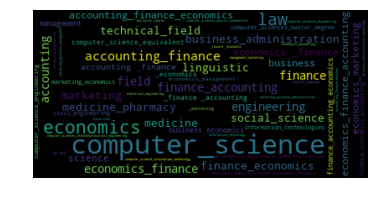

In [41]:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [44]:
df["RequiredQual_degree_names"].to_csv("../outputs/qual_with_degrees.csv")